In [1]:
from photutils.segmentation import SourceCatalog, deblend_sources, detect_sources, detect_threshold
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
#Abrimos los datos de los fits
img_b = fits.open('Img_B.fits')[0].data
img_v = fits.open('Img_V.fits')[0].data
hdr_b = fits.open('Img_B.fits')[0].header
hdr_v = fits.open('Img_V.fits')[0].header
hdr_b

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Martinez, Oyarzo, Vargas' / SBIGFITSEXT The name of the observer     
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{36922ce2-fadc-41

In [3]:
#Threshold para detectar fuentes
threshold_b = detect_threshold(img_b, nsigma = 2.2)
threshold_v = detect_threshold(img_v, nsigma = 2.5)
#detecta las zonas realmente brillantes, no el ruido tenue.
#Detectamos fuentes
sour_b = detect_sources(img_b, threshold_b, npixels = 300)
sour_v = detect_sources(img_v, threshold_v, npixels = 400)
#asegura que solo se detecten regiones grandes del gas ionizado, no estrellas aisladas.

print(sour_b, sour_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 231
labels: [  1   2   3   4   5 ... 227 228 229 230 231] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 271
labels: [  1   2   3   4   5 ... 267 268 269 270 271]


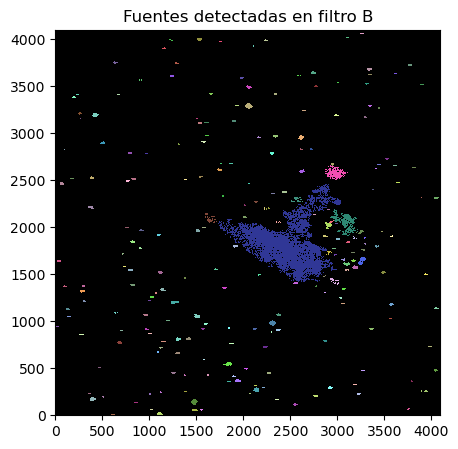

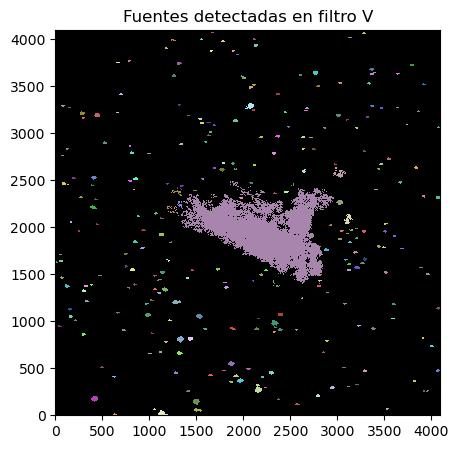

In [4]:
#Mapa de colores
cmap_sour_b = sour_b.make_cmap(seed=123)
cmap_sour_v = sour_v.make_cmap(seed=123)

#Graficamos fuentes
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_b, origin='lower', cmap=cmap_sour_b, interpolation='nearest')
plt.title('Fuentes detectadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_v, origin='lower', cmap=cmap_sour_v, interpolation='nearest')
plt.title('Fuentes detectadas en filtro V')
plt.show()

plt.imsave('fuentes_V.jpeg', sour_v, origin='lower', cmap=cmap_sour_v)

In [5]:
#Separamos fuentes
deblend_b = deblend_sources(img_b, sour_b, npixels=80, nlevels=32, contrast=0.05)
deblend_v = deblend_sources(img_v, sour_v, npixels=100, nlevels=32, contrast=0.05)
#npixels tamaño mínimo para considerar una subregión significativa.
#contrast evita dividir la nebulosa en demasiados trozos.
#nlevels uficiente resolución sin fragmentar el gas difuso.
print(deblend_b, deblend_v)

Deblending:   0%|          | 0/231 [00:00<?, ?it/s]

Deblending:   0%|          | 0/271 [00:00<?, ?it/s]

Exception in thread Thread-3:
Traceback (most recent call last):
  File "C:\Users\Valem\anaconda3\envs\astro_env\lib\threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\tqdm\_monitor.py", line 84, in run
    instance.refresh(nolock=True)
  File "C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\tqdm\std.py", line 1347, in refresh
    self.display()
  File "C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\tqdm\notebook.py", line 171, in display
    rtext.value = right
  File "C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\traitlets\traitlets.py", line 716, in __set__
    self.set(obj, value)
  File "C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\traitlets\traitlets.py", line 706, in set
    obj._notify_trait(self.name, old_value, new_value)
  File "C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\traitlets\traitlets.py", line 1513, in _notify_trait
    self.notify_c

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 261
labels: [  1   2   3   4   5 ... 257 258 259 260 261] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 298
labels: [  1   2   3   4   5 ... 294 295 296 297 298]


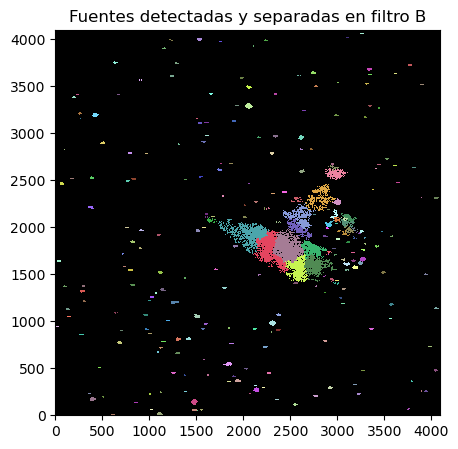

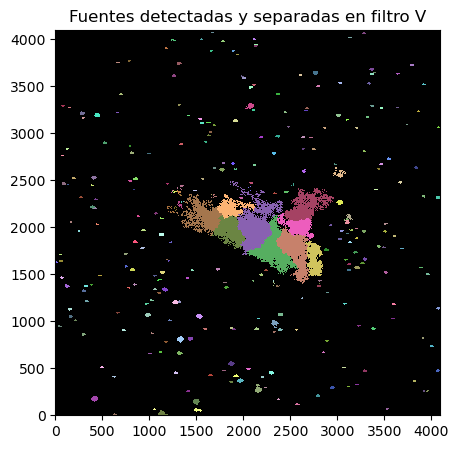

In [6]:
cmap_deblend_b = deblend_b.make_cmap(seed=123)
cmap_deblend_v = deblend_v.make_cmap(seed=123)

#Las vemos

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_b, origin='lower', cmap=cmap_deblend_b,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_v, origin='lower', cmap=cmap_deblend_v,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro V')
plt.show()

In [7]:
#Catalogo
cat_b = SourceCatalog(img_b, deblend_b)
cat_v = SourceCatalog(img_v, deblend_v)
tbl_b = cat_b.to_table()
tbl_v = cat_b.to_table()
print(tbl_b)
print(tbl_v)

C:\Users\Valem\anaconda3\envs\astro_env\lib\site-packages\gwcs\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1   616.691563967554 5.2772719810015065 ...  71486.49507798775          nan
    2 1111.2585988586243   8.10666207721691 ...  497340.4648758201          nan
    3 1026.9013290803707  58.11009960863633 ... 183714.97434038503          nan
    4 1559.8390815663045  55.31607042089469 ... 154280.79941350778          nan
    5  3760.461723044376  62.51230873044784 ...  49480.34770731713          nan
    6 1478.6268524042805 140.34429688149987 ...  802658.4302800549          nan
    7 2553.7606968734035  111.7651510118626 ... 178706.79069339304          nan
    8   861.388458799404 131.42163281591596 ... 158779.04522727375          nan
    9  397.6931044007125 170.41314317342506 ... 447630.55977997236          nan
  ...                ...                

In [9]:
#Tablas
tabla_b = cat_b.to_table()['label','xcentroid','ycentroid','area','segment_flux']
tabla_v = cat_v.to_table()['label','xcentroid','ycentroid','area','segment_flux']

#Printeo las tablas con los datos
print(tabla_b, tabla_v)

label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
----- ------------------ ------------------ ------- ------------------
    1   616.691563967554 5.2772719810015065   452.0 18498.670307159424
    2 1111.2585988586243   8.10666207721691  1653.0 496506.58297920227
    3 1026.9013290803707  58.11009960863633   372.0 10160.198276519775
    4 1559.8390815663045  55.31607042089469   428.0 14022.948657989502
    5  3760.461723044376  62.51230873044784   332.0 24571.030668258667
    6 1478.6268524042805 140.34429688149987  3192.0  797724.1962223053
    7 2553.7606968734035  111.7651510118626   915.0  55524.50502204895
    8   861.388458799404 131.42163281591596   394.0 11880.442680358887
    9  397.6931044007125 170.41314317342506  2075.0   418405.802444458
  ...                ...                ...     ...                ...
  252 3263.0721700611184 1953.4820461704917  1067.0  49631.80796813965
  253 

In [10]:
#Flujo real
tabla_b['segment_flux'] = tabla_b['segment_flux']/hdr_b['EXPTIME']
tabla_v['segment_flux'] = tabla_v['segment_flux']/hdr_v['EXPTIME']

print(tabla_b, tabla_v)

label     xcentroid          ycentroid        area     segment_flux   
                                              pix2                    
----- ------------------ ------------------ ------- ------------------
    1   616.691563967554 5.2772719810015065   452.0  616.6223435719808
    2 1111.2585988586243   8.10666207721691  1653.0 16550.219432640075
    3 1026.9013290803707  58.11009960863633   372.0  338.6732758839925
    4 1559.8390815663045  55.31607042089469   428.0  467.4316219329834
    5  3760.461723044376  62.51230873044784   332.0  819.0343556086223
    6 1478.6268524042805 140.34429688149987  3192.0  26590.80654074351
    7 2553.7606968734035  111.7651510118626   915.0 1850.8168340682982
    8   861.388458799404 131.42163281591596   394.0  396.0147560119629
    9  397.6931044007125 170.41314317342506  2075.0 13946.860081481933
  ...                ...                ...     ...                ...
  252 3263.0721700611184 1953.4820461704917  1067.0 1654.3935989379884
  253 

In [11]:
#Magnitudes con los zeropoint de la calibracion
zp_b = 39.26419337328454
zp_v = 39.65931555000034
tabla_b['magnitude'] = zp_b - 2.5 * np.log(tabla_b['segment_flux'])
tabla_v['magnitude'] = zp_v - 2.5 * np.log(tabla_v['segment_flux'])
print(tabla_b, tabla_v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1   616.691563967554 ...  616.6223435719808  23.20355149445347
    2 1111.2585988586243 ... 16550.219432640075 14.978806774566777
    3 1026.9013290803707 ...  338.6732758839925  24.70160373657108
    4 1559.8390815663045 ...  467.4316219329834 23.896060686318854
    5  3760.461723044376 ...  819.0343556086223 22.493878295251186
    6 1478.6268524042805 ...  26590.80654074351 13.793391332632496
    7 2553.7606968734035 ... 1850.8168340682982  20.45573749189794
    8   861.388458799404 ...  396.0147560119629  24.31056469024275
    9  397.6931044007125 ... 13946.860081481933 15.406669177910484
  ...                ... ...                ...                ...
  252 3263.0721700611184 ... 1654.3935989379884 20.736218835302694
  253  2895.621646466847 ...  649.2674004236857 23.07458174580

In [12]:
print(f"{np.sort(tabla_b['magnitude'])}")
print(f"{np.sort(tabla_v['magnitude'])}")

    magnitude     
------------------
 11.22141856593565
11.480249894094538
11.670454687957307
12.251664417598572
 12.33835367630472
12.534481781546415
 12.86069378690437
13.000116152058823
13.450706031407478
13.793391332632496
               ...
25.058503525523257
25.340716927472698
25.433550812562856
25.480540411620467
25.760049631602925
26.061407756767558
26.609904428272372
  26.9125885134996
27.006946074658384
 27.04961765940497
Length = 261 rows
    magnitude     
------------------
 7.812939612765653
 8.892524817531417
 8.907165209650188
 9.426687433668565
 9.518305041731857
 9.642003670633127
 9.911024107769435
10.552760608952145
11.078723888726515
11.127217843194863
               ...
 23.79985453061758
23.939954522491856
 24.15444888294946
 24.66209776773035
24.819206939533927
25.032147746890672
25.102667851946222
 25.15008876428138
25.209520581403492
25.910055696435425
Length = 298 rows


In [15]:
n = min(len(tabla_v), len(tabla_b))
B_V = tabla_v['magnitude'][:n]-tabla_b['magnitude'][:n]

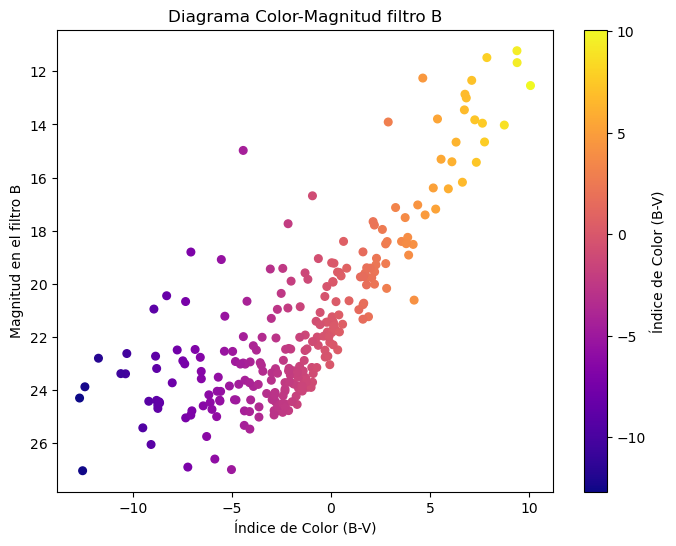

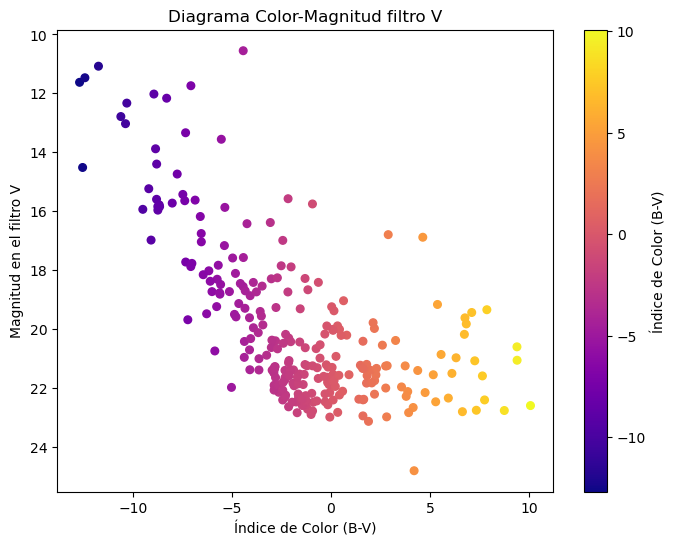

In [17]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_b['magnitude'][:n], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro B")
plt.title("Diagrama Color-Magnitud filtro B")

plt.show()

# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tabla_v['magnitude'][:n], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro V")
plt.title("Diagrama Color-Magnitud filtro V")

plt.show()